In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Charger les données
df = pd.read_csv("compositions-du-trafic-2.csv", sep=";")
df.head()

,année,site,tronçon,arrondissement,coordonnées,latitude,longitude,période,heure,catégories de véhicules,données,secteur
0,2016-01-01,Porte de Saint-Cloud,en direction de la Porte d'Auteuil,BP,"48.84165, 2.22163",48.84165,2.22163,MOYENNE DU 24 AU 26 NOVEMBRE 2016,08h-09h,Cars,13.000000,Boulevard Périphérique
1,2016-01-01,Porte de Saint-Cloud,en direction de la Porte d'Auteuil,BP,"48.84165, 2.22163",48.84165,2.22163,MOYENNE DU 24 AU 26 NOVEMBRE 2016,14h-15h,Véhicules Utilitaires,786.000000,Boulevard Périphérique
2,2016-01-01,Porte de Saint-Cloud,en direction de la Porte de Sèvres,BP,"48.84165, 2.22163",48.84165,2.22163,MOYENNE DU 24 AU 26 NOVEMBRE 2016,07h-08h,Taxis,125.666667,Boulevard Périphérique
3,2016-01-01,Porte de Saint-Cloud,en direction de la Porte de Sèvres,BP,"48.84165, 2.22163",48.84165,2.22163,MOYENNE DU 24 AU 26 NOVEMBRE 2016,08h-09h,Cars,5.333333,Boulevard Périphérique
4,2016-01-01,Porte de Saint-Cloud,en direction de la Porte de Sèvres,BP,"48.84165, 2.22163",48.84165,2.22163,MOYENNE DU 24 AU 26 NOVEMBRE 2016,10h-11h,Véhicules Utilitaires,960.666667,Boulevard Périphérique


In [5]:
# Convertir les colonnes utiles
df["année"] = pd.to_datetime(df["année"], errors='coerce').dt.year
df["données"] = pd.to_numeric(df["données"], errors='coerce')

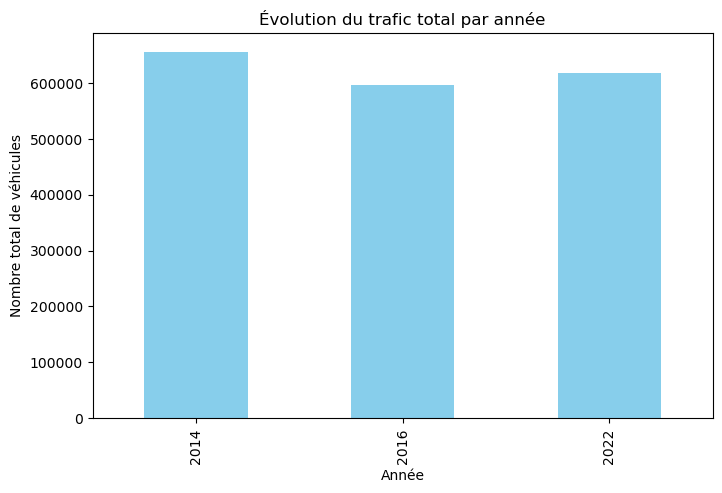

In [6]:
# 1. Évolution du trafic total par année
plt.figure(figsize=(8, 5))
df.groupby("année")["données"].sum().plot(kind="bar", color="skyblue")
plt.title("Évolution du trafic total par année")
plt.ylabel("Nombre total de véhicules")
plt.xlabel("Année")
plt.show()

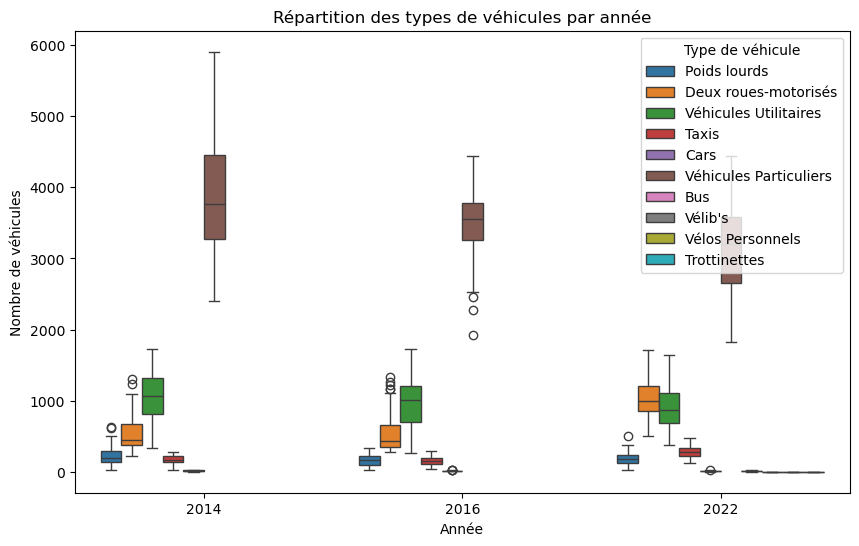

In [7]:
# 2. Répartition des types de véhicules
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="année", y="données", hue="catégories de véhicules")
plt.title("Répartition des types de véhicules par année")
plt.ylabel("Nombre de véhicules")
plt.xlabel("Année")
plt.legend(title="Type de véhicule")
plt.show()

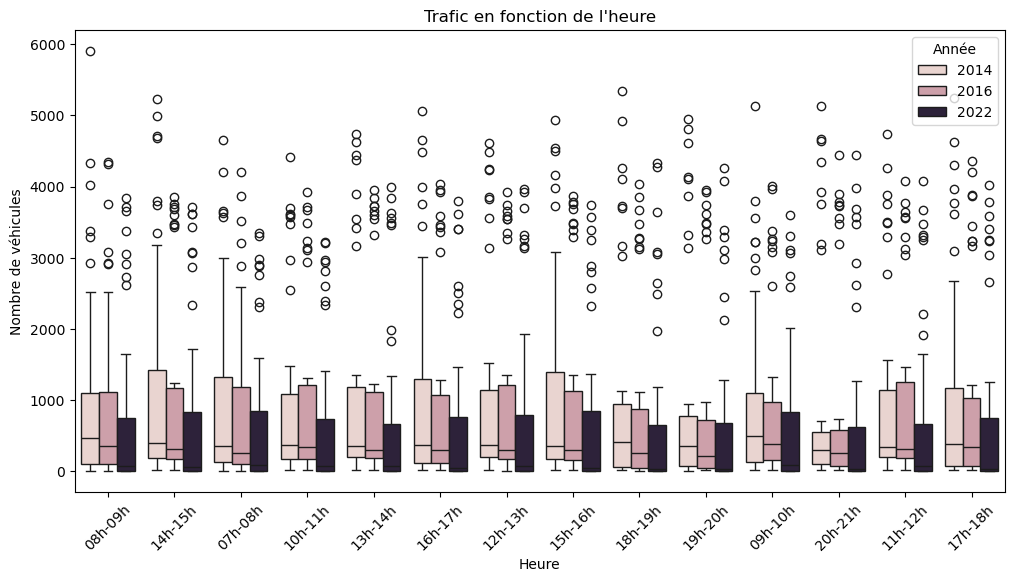

In [ ]:
# 3. Trafic en fonction de l'heure
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="heure", y="données", hue="année")
plt.xticks(rotation=45)
plt.title("Trafic en fonction de l'heure")
plt.ylabel("Nombre de véhicules")
plt.xlabel("Heure")
plt.legend(title="Année")
plt.show()

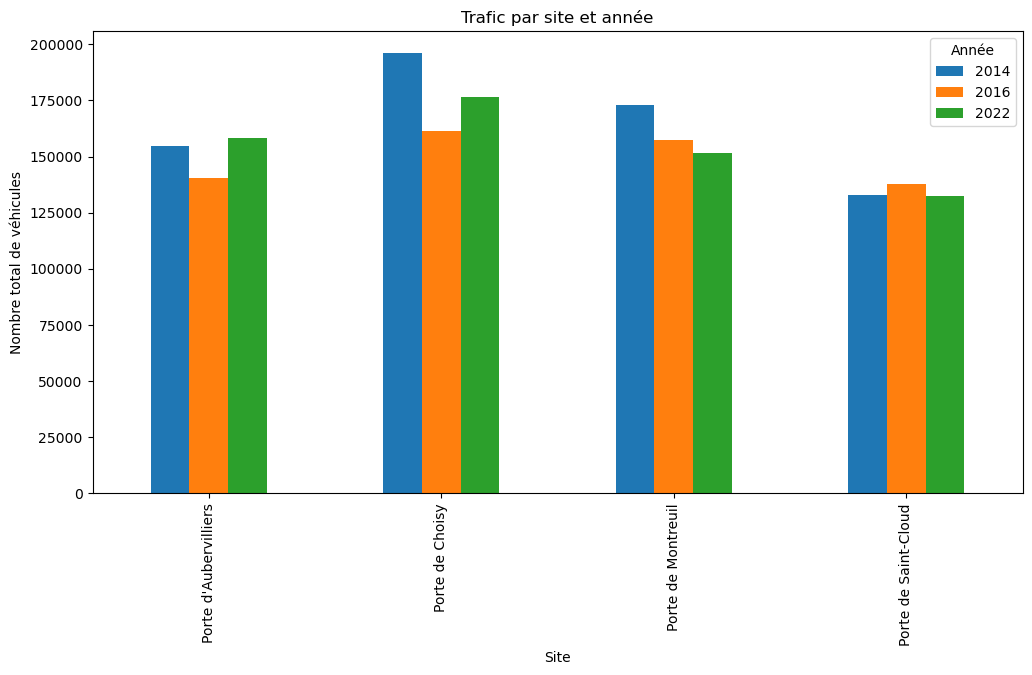

In [9]:
# 4. Trafic par site et tronçon
df_site = df.groupby(["site", "année"])["données"].sum().unstack()
df_site.plot(kind="bar", figsize=(12, 6))
plt.title("Trafic par site et année")
plt.ylabel("Nombre total de véhicules")
plt.xlabel("Site")
plt.xticks(rotation=90)
plt.legend(title="Année")
plt.show()